# Sociology 130AC Module: "The Neighborhood Project"

Context tile.

Welcome to the data science part of your project! You have gathered data and entered it [here](https://docs.google.com/forms/d/e/1FAIpQLSc1dLe7Hh_fu-VSV7Y-gcVsniaFP94kpl1Sw4x1-CE9nmTZjg/viewform) from census tracts.  Now it's time to quantify your observations using Python for basic data science. However, you will not need any prior programming knowledge as the purpose is not to teach you programming, but rather show you the powers of programming to real life applications.

First, we have to import basic data science libraries. These libraries allow us manipulate the data easily as well as have great visualizations. If you are interested in what these are:numPy is a scientific computing library, Pandas is a data analysis library and matplotlib is a data visualization library.

In [124]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from datascience import *
# from ipywidgets import *
# import folium
# from IPython.display import HTML, display
# from folium import plugins
# from scipy.ndimage import imread
# %matplotlib inline

After crowdsourcing your data and the rest of the class, we will use a library called Folium to map your observations onto a map of San Francisco(NOT SURE LOCATION YET????). Click on a marker below to see a pop-up of the data at a particular point. Try to find the census tract you visited and see if the data you collected is there! 

Next, click around census tracts near yours to see if the other students' observations are similar and see if you can eyeball any trends. Check out other areas on the map and see if there are trends around "good" neighborhoods and "bad" neighborhoods. Do "bad" and "good" neighborhoods have similar trends in data? Which types of data do you think correlate the most to how safe a neighborhood is? On a larger scale, what do you think defines a good neighborhood or a bad neighborhood?

After you have made some predictions, we will analyze some important factors contributing to neighborhoods. As you know, good and bad are very subjective terms, so instead, it is more scientific to analyze factors that contribute to good neighborhoods, such as income, education, and employment rates. We have turned your data into a point scale and will compare your data to the offical data from American Fact Finder. Let's get started!

test

In [125]:
# LDN_COORDINATES = (37.7749, -122.4194)
# myMap = folium.Map(location=LDN_COORDINATES, zoom_start=12)

# #Folium formats popup windows in html format
# html_1="""
#     <h3>Good Neighborhood</h3>
#     <img
#        src = http://images.glaciermedia.ca/polopoly_fs/1.1827657.1429305764!/fileImage/httpImage/image.jpg_gen/derivatives/original_size/vancouver-single-family-home-neighbourhood-street.jpg
#        style="width:180px;height:128px;"
#        >
#     <p>
#        "This neighborhood seemed really nice to our group"
#     </p>
#     <p>
#        # of cigarette buds: 0
#     </p>
#     """

# html_2="""
#     <h3>Bad Neighborhood</h3>
#     <img
#         src = http://static.lakana.com/nxsglobal/lasvegasnow/photo/2015/06/23/bad%20neighborhood_1435097179455_1625324_ver1.0_640_360.jpg
#         style="width:180px;height:128px;"
#         >
#     <p>
#         "This neighborhood didn't seem safe"
#     </p>
#     <p>
#         # of cigarette buds: 100
#     </p>
#     """


# folium.Marker([37.803, -122.435], 
#               popup=folium.Popup(folium.IFrame(html=html_1, width=200, height=300), max_width=2650)).add_to(myMap)
# folium.Marker([37.765, -122.415], 
#               popup=folium.Popup(folium.IFrame(html=html_2, width=200, height=300), max_width=2650)).add_to(myMap)

# lat_shift = 0.065
# lon_shift = 0.085

# san_fran_lat = 37.7685
# san_fran_lon = -122.4364

# data = imread('./CensusMap.png')
# myMap.add_child(plugins.ImageOverlay(data, opacity=0.8, \
#         bounds =[[san_fran_lat - lat_shift, san_fran_lon - lon_shift], [san_fran_lat + lat_shift, san_fran_lon + lon_shift]]))

# myMap

First let's put all of the data onto a table. Graphs are nice for visualization to get a general idea, but it's a lot easier to manipulate graphs to get concrete results. The table below should show five columns: The first column should be the census tract, the seccond column is the points it received based on your survey, the third column is income, the fourth column is employment, and the fifth column is education level. Find your census tract and see if the income and employment and education level is what you expected to be based on your thoughts about the neighborhood.

In [126]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
#put all of our data into one table
class_data = pd.DataFrame({
                    "empty bottles": np.array([1,0,0,1,1]),
                     "cigarettes": np.array([0,1,1,0,0]),
                     "condoms": np.array([1,0,1,1,1]),
                     "garbage": np.array([1,0,0,1,1]),
                     "cars Abandoned": np.array([1,1,0,0,1]),
                     "friendliness": np.array([3,2,4,1,5]),
                     "condition": np.array([1,0,3,1,4]),
                     "graffiti": np.array([1,1,0,0,0]),
                     "fence": np.array([1,2,4,4,1])
                    },index = [4201, 4202, 4203, 4204,4205])

#unemployment percent is for 16 years and older
#education: percent of people who have bachelors degree or higher. added up bachelors+graduates
#income: estimated household income
#I got the data by approximating what I saw on factfinder. Numbers are plausible.
official_data = pd.DataFrame({
                             "income": np.array([140000,160000,80000,120000,140000]),
                              "unemployment %": np.array([5.6,  2.2, 8.8, 3.3, 5.0]),
                              "education": np.array([79, 83,74,78,84]),
                             }, index=[4201, 4202, 4203, 4204,4205])
class_data




,cars Abandoned,cigarettes,condition,condoms,empty bottles,fence,friendliness,garbage,graffiti
4201,1,0,1,1,1,1,3,1,1
4202,1,1,0,0,0,2,2,0,1
4203,0,1,3,1,0,4,4,0,0
4204,0,0,1,1,1,4,1,1,0
4205,1,0,4,1,1,1,5,1,0


In [127]:
combined_data = pd.DataFrame(columns=[ "Points", "Income", "Employment", "Education"])

for tract in class_data.index.values:
    points = sum(class_data.loc[tract])
    income = official_data.loc[tract]["income"]
    unemployment = official_data.loc[tract]["unemployment %"]
    education = official_data.loc[tract]["education"]
    combined_data.loc[tract]= [points, income, unemployment, education]

combined_data
    
    
    


,Points,Income,Employment,Education
4201,10.0,140000.0,5.6,79.0
4202,7.0,160000.0,2.2,83.0
4203,13.0,80000.0,8.8,74.0
4204,9.0,120000.0,3.3,78.0
4205,14.0,140000.0,5.0,84.0


Let's first analyze income levels. We have sorted the data according to income level. Compare the income levels to the neighborhood points. Is there a correlation you can spot(as one increases or decreases, does the other do the same)?

Did you look at the whole table? A common mistake is to assume that since the top 10 results follow or do not follow a pattern, the rest don't. Real life data is often messy and not clean. Does the correlation continue throughout the whole table(a.k.a. as income decreases the points decrease) or is there no pattern? What does this mean about the data?


In [128]:
#sort by income
combined_data.sort_values("Income")

,Points,Income,Employment,Education
4203,13.0,80000.0,8.8,74.0
4204,9.0,120000.0,3.3,78.0
4201,10.0,140000.0,5.6,79.0
4205,14.0,140000.0,5.0,84.0
4202,7.0,160000.0,2.2,83.0


Now let's analyze education levels and employment. Now we will try to analyze the tables sorted by employment and education. To sort by either, you must delete the hashtag on the line you want to sort by below. A hashtag means that the code is a comment, which means it will not run. Therefore, when you remove the hashtag, it will the run the line. Put the hashtag back to comment the code.

In [129]:
#combined_data.sort_values("Employment")
#combined_data.sort_values("Education")

As keen as your eyes are or aren't, a good analysis isn't based on just what you see; you must quantify it with numbers and statistics to prove your thoughts. Here is the list of all of the census tracts and in every column is a data type that you collected. Right now, the data is sorted by the column 'cigarette butts found' in descending order. To change how it is sorted, simply change the column name to the column you want to sort it by, i.e. 'children playing'. Make sure the name of the column is in quotes! Also, if you want it in ascending order, change the descending to ascending. Also, you can change the amount of results it returns by changing the number inside the list command.

Play around with sorting different columns and attributes. Which sorted column leads to many similar results as the official data of best and worst neighborhoods?

In [130]:
#table of data they collected. Sorted by cigarette butts and top 15 search results.
#was thinking we have examples of how to sort data? the other possibility I could think of was to 
#add more cells with the code written for each data sorted.

As keen as your eyes are or aren't, a good analysis isn't based on just what you see; you must quantify it with numbers and statistics to prove your thoughts. This is not a very statistical measure of how much a variable correlates to the results. What does it mean for a variable "income" to match 7 out of the top 15 neighborhood points? Does this correlate to the rest of the results? How well does it correlate? We will now use a method called linear regression to make a graph that will show the best fit line that correlates to the data. The variable "r squared" is a measure of how close the data is to the fitted regression line. 0 means the variable explains none of the variability of the data while 1 means it explains all of the variability in the data.

We want to plot the change in Points with respect to a certain variable(like education or income). Therefore, the Y axis will always be points and the X axis will be the variable that we want to analyze. Right now, the x variable is set to "Education". You can change the column name like in the previous code to change the x axis. The graph will give you a better sense of the whole data rather than just sorting columns like you did above. The R-squared value will give you an exact "goodness-of fit" value for your model. 

Why is this a better method than just sorting tables? First of all, we are now comparing all of the data in the graph to the variable, rather than comparing what our eyes glance quickly over. It shows a more complete picture than just saying "There are some similar results in the top half of the sorted data". Second of all, the graph gives a more intuitive sense to see if your variable does match the data. You can quickly see if the data points match up with the regression line. Lastly, the r-squared value will give you a way to quantify how good the variable is to explain the data.

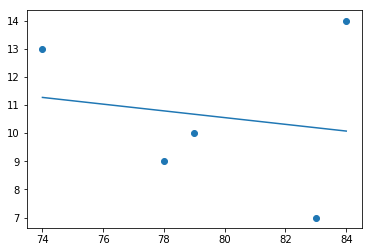

The r squared coefficient is:  0.0281062901914


In [135]:
#linear regression model of x being a column and y being the neighborhoods.
#just to see how well they correlate. Could write all the code out for them
x = combined_data["Education"]
y = combined_data["Points"]

plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x))) #calculate linear regression line
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("The r squared coefficient is: ", r_value**2)

Let's improve on our model even further. Right now we are choosing only one variable to try to explain our data. But in real life, there is not only one factor that contributes to a good or bad neighborhood; so why are we trying to explain it using only one variable? No wonder it's difficult to get the whole picture! We will now use multiple regression to use 2(or 3) variables to make our model even more accurate. Try changing up the column names to see close your regression line is now!

In [ ]:
#Multiple regression with two or three variables? Having a slider to adjust weights?
#not sure if we could do this if our table only has five rows. Does it really make sense? 
#maybe instead make them use linear regression on different colums other neighborhood points?